In [11]:
import pandas as pd

df = pd.read_csv("../data/processed/engineered_features.csv")

print("Rows:", len(df))
df.head()


Rows: 18684


,State_x,Year,Annual_Rainfall,Avg_Temperature,State_y,Total_Production,Temp_Level,Avg_Rainfall_State,Rainfall_Deviation,Log_Production
0,ANDAMAN & NICOBAR ISLANDS,1997,2755.1,29.179167,Andhra Pradesh,21093500.0,High,2890.44605,-135.34605,16.864476
1,ANDAMAN & NICOBAR ISLANDS,1997,2755.1,29.179167,Arunachal Pradesh,267148.0,High,2890.44605,-135.34605,12.495562
2,ANDAMAN & NICOBAR ISLANDS,1997,2755.1,29.179167,Assam,5778334.0,High,2890.44605,-135.34605,15.569626
3,ANDAMAN & NICOBAR ISLANDS,1997,2755.1,29.179167,Bihar,19031372.0,High,2890.44605,-135.34605,16.761599
4,ANDAMAN & NICOBAR ISLANDS,1997,2755.1,29.179167,Goa,72538.0,High,2890.44605,-135.34605,11.191880


In [20]:
features = df[[
    "Annual_Rainfall",
    "Avg_Temperature",
    "Rainfall_Deviation",
    "Log_Production"
]]

features.head()


,Annual_Rainfall,Avg_Temperature,Rainfall_Deviation,Log_Production
0,2755.1,29.179167,-135.34605,16.864476
1,2755.1,29.179167,-135.34605,12.495562
2,2755.1,29.179167,-135.34605,15.569626
3,2755.1,29.179167,-135.34605,16.761599
4,2755.1,29.179167,-135.34605,11.191880


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [22]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt


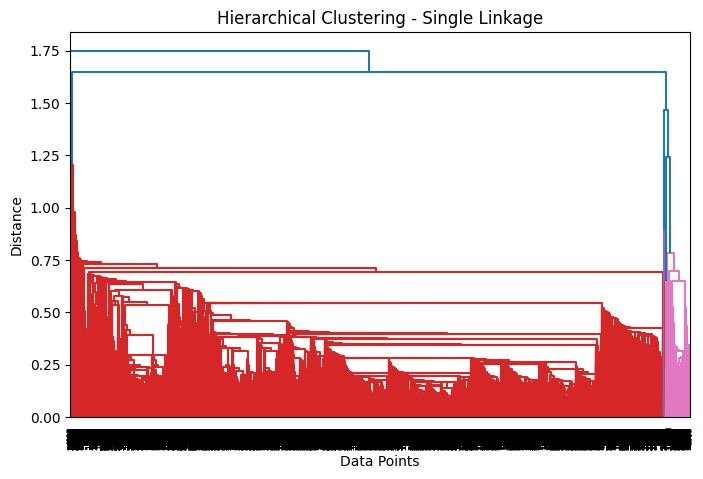

In [15]:
single_scaled = scaled_features[:300]

single_link = linkage(single_scaled, method="single")

plt.figure(figsize=(8,5))
dendrogram(single_link)
plt.title("Hierarchical Clustering - Single Linkage")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

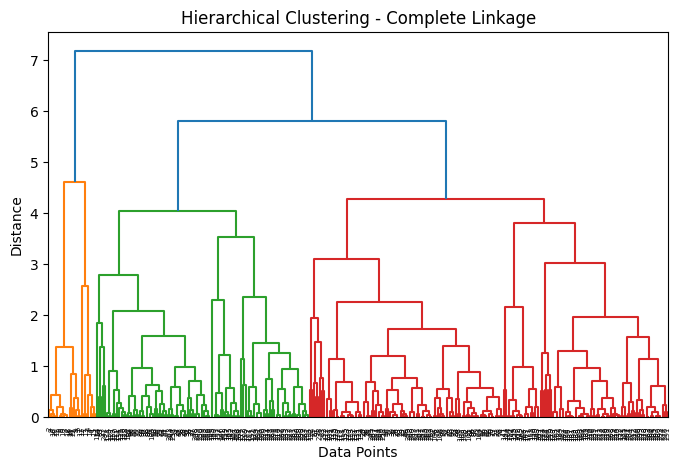

In [16]:
complete_scaled = scaled_features[:300]

complete_link = linkage(complete_scaled, method="complete")

plt.figure(figsize=(8,5))
dendrogram(complete_link)
plt.title("Hierarchical Clustering - Complete Linkage")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

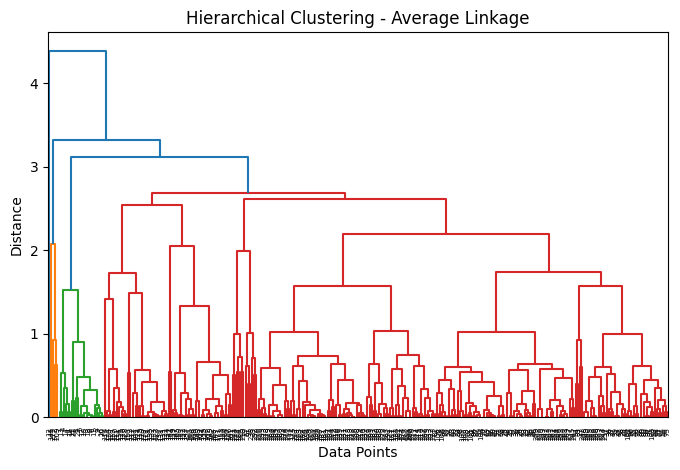

In [17]:
average_scaled = scaled_features[:300]

average_link = linkage(average_scaled, method="average")

plt.figure(figsize=(8,5))
dendrogram(average_link)
plt.title("Hierarchical Clustering - Average Linkage")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


In [ ]:
from scipy.cluster.hierarchy import fcluster

full_average_link = linkage(scaled_features, method="average")

df["Cluster"] = fcluster(full_average_link, 3, criterion="maxclust")

df["Cluster"].value_counts()


Cluster
3    18646
1       36
2        2
Name: count, dtype: int64

In [19]:
df[["Annual_Rainfall", "Avg_Temperature", "Rainfall_Deviation", "Cluster"]].head()


,Annual_Rainfall,Avg_Temperature,Rainfall_Deviation,Cluster
0,2755.1,29.179167,-135.34605,3
1,2755.1,29.179167,-135.34605,3
2,2755.1,29.179167,-135.34605,3
3,2755.1,29.179167,-135.34605,3
4,2755.1,29.179167,-135.34605,3
